Двунаправленные (bidirectional) рекуррентные нейронные сети | #26 нейросети на Python

In [2]:

import numpy as np
import os
from tensorflow.keras.layers import Dense, SimpleRNN, Input, Embedding,LSTM, GRU, Flatten, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

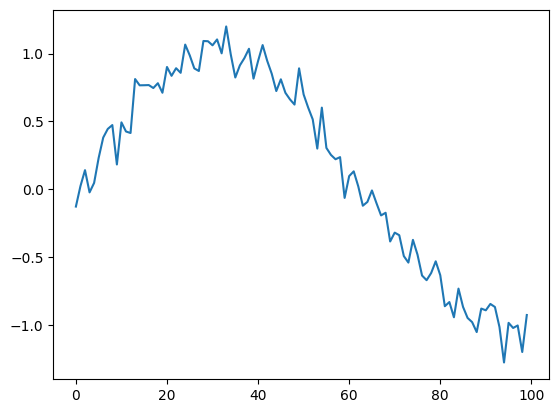

In [3]:
N = 10000
data = np.array([np.sin(x/20) for x in range(N)]) + np.random.normal(0, 0.1, N)
plt.plot(data[:100])
plt.show()

In [4]:
off = 3
length = off * 2+1
x = np.array([ np.diag(np.hstack((data[i:i+off], data[i+off+1:i+length]))) for i in range(N - length)])
y = data[off:N-off-1]
print(x.shape, y.shape)

(9993, 6, 6) (9993,)


In [5]:
model = Sequential()
model.add(Input((length-1, length-1)))
model.add(Bidirectional(GRU(32)))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mean_squared_error', optimizer=Adam(0.01))

history = model.fit(x, y, epochs=10, batch_size=32)
print(x.shape)  # Должно быть (samples, timesteps, features)


2025-01-02 12:26:24.617820: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-01-02 12:26:24.617842: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-01-02 12:26:24.617848: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-01-02 12:26:24.618012: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-02 12:26:24.618023: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 64)             │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,745 (30.25 KB)

 Trainable params: 7,745 (30.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-01-02 12:26:25.144862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0348
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0124
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0124
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0129
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0126
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0122
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0129
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0123
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0124
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0123
(9993, 6, 6)


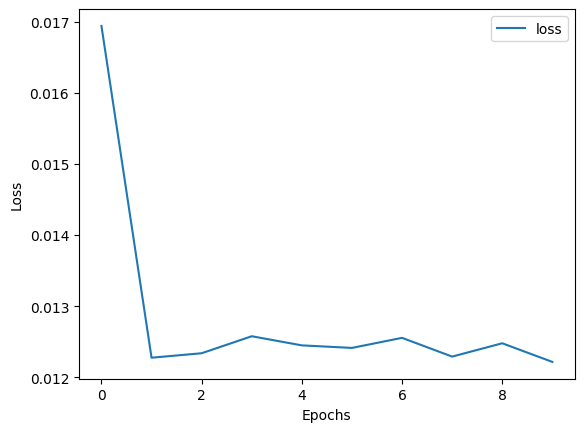

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/var/folders/07/56f70q6n70d3v657jsy7fjgr0000gn/T/ipykernel_52564/2876566942.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  XX[i+off+1] = y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

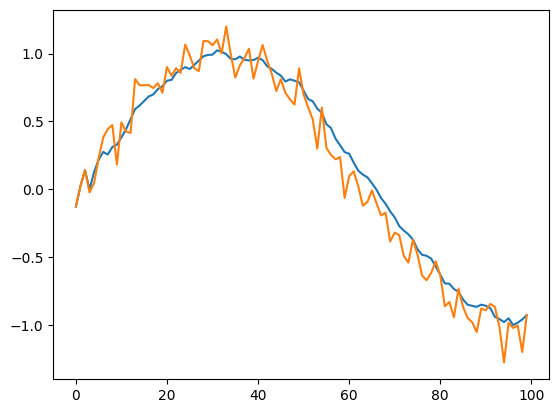

In [19]:
M = 100
XX = np.zeros(M)
XX[:off] = data[:off]
for i in range(M-off-1):
    x = np.diag( np.hstack((XX[i:i+off], data[i+off+1:i+length])))
    x = np.expand_dims(x, axis=0)
    y = model.predict(x)
    XX[i+off+1] = y

plt.plot(XX)
plt.plot(data[:M])
plt.show()